# Datasets description

dataset:
three dataset:
first:
y: close price, x : all news parameters and extra info
file: close_all_news_extra check
second:
y: close price, x : three news parameters and extra info
file: close_three_news_extra check 
third:
y: close price - open price, x : all news parameters and extra info
file: different_all_news_extra
fourth:
y: close price - open price, x :  three news parameters and extra info
file: different_three_news_extra check

In [86]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import datasets, linear_model, preprocessing
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
import sklearn.linear_model
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
import numpy.random as r
from keras import metrics

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [87]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers
import keras.backend as K
K.clear_session()

In [88]:
close_all_news_extra = pd.read_csv("close_all_news_extra.csv")
close_all_news_extra = close_all_news_extra.drop(columns= ["appear"])

close_three_news_extra = pd.read_csv("close_three_news_extra.csv")
close_three_news_extra = close_three_news_extra.drop(columns= ["appearence"])

different_all_news_extra = pd.read_csv("different_all_news_extra.csv")
different_all_news_extra = different_all_news_extra.drop(columns= ["appear"])

different_three_news_extra = pd.read_csv("different_three_news_extra.csv")
different_three_news_extra = different_three_news_extra.drop(columns= ["appearence"])

print(different_all_news_extra.shape)
print(close_all_news_extra.shape)

(658, 40)
(658, 40)


In [89]:
xx = [1,2,3,4,5]
yy = [1,2,3,4,5]


In [90]:
close_all_news_extra.columns

Index(['Unnamed: 0', 'Euro exchange rate', 'Date', 'Hong Kong exchange rate',
       'Canada exchange rate', 'China exchange rate', 'QCOM close price',
       'MSFT close price', 'TXN close price', 'APPL close price',
       'social_media', 'computer', 'business', 'programming', 'hearing',
       'urban', 'shopping', 'science', 'work', 'valuable', 'fashion',
       'technology', 'competing', 'economics', 'office', 'cheerfulness',
       'optimism', 'celebration', 'trust', 'positive_emotion', 'hate',
       'aggression', 'horror', 'suffering', 'ridicule', 'irritability',
       'deception', 'disappointment', 'negative_emotion', 'nervousness'],
      dtype='object')

In [91]:
close_three_news_extra.columns

Index(['Unnamed: 0', 'Euro exchange rate', 'Date', 'Hong Kong exchange rate',
       'Canada exchange rate', 'China exchange rate', 'QCOM close price',
       'MSFT close price', 'TXN close price', 'APPL close price',
       'new_correlation', 'pos_re', 'neg_re'],
      dtype='object')

In [92]:
def plot(test, prediction, num, title):
    plt.plot(num, prediction, 'r-', label = "prediction")
    plt.plot(num, test, 'b-', label ="real value")
    plt.title(title)
    plt.legend(loc = "upper right")
    plt.show()

In [93]:
# pull out the y and x, and transfer into dataset:
def transfer_dataframe_to_x_y(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    y = y.reshape(y.shape[0],1)
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

# Linear Regression models
now we have a table that:
        redge degree:   0, 0.35, 0.5, 0.75
        polynomial degree: 1, 2


In [94]:
X_close_three_news_extra,Y_close_three_news_extra = transfer_dataframe_to_x_y(close_three_news_extra,"APPL close price")
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y(different_three_news_extra,"APPL diff")
X_close_all_news_extra, Y_close_all_news_extra = transfer_dataframe_to_x_y(close_all_news_extra,"APPL close price")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y(different_all_news_extra,"APPL diff")
print()

In [95]:
def linear_fit(X_train, X_test, Y_train, Y_test, alpha):
    ridge = Ridge(alpha)
    ridge.fit(X_train,Y_train)
    train_error = (1/Y_train.shape[0])*np.sum((Y_train-ridge.predict(X_train))**2)
    test_error = (1/Y_test.shape[0])*np.sum((Y_test-ridge.predict(X_test))**2)
    R2 = 1 - np.sum((Y_train - ridge.predict(X_train))**2) / np.sum((Y_train - np.mean(Y_train))**2)
    return train_error, test_error, R2, ridge

In [96]:
def model_selection(X, Y):
    deg_list = [1,2,3,4,5]
    alpha_list = [0,0.35,0.5,0.75]
    mse_tr = []
    mse_test = []
    for elem in deg_list:
        temp_mse_tr = None
        temp_mse_test = None
        if elem != 1:
    #         print(elem)
            poly = PolynomialFeatures(int(elem))
            X_poly = poly.fit_transform(X)
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.3)
        else:
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X, Y, test_size=0.3)            
        for alpha in alpha_list:
#             print(alpha)
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
#             print("train_error: ", train_error, "alpha: ", alpha)
#             print("before condition: ", temp_mse_tr)
            if temp_mse_tr is None:
                temp_mse_tr = (train_error, float(alpha))
            elif temp_mse_tr[0] > train_error:
#                 print("updating: ", alpha)
                temp_mse_tr = (train_error, float(alpha))
                
            if temp_mse_test is None:
                temp_mse_test = (test_error, float(alpha))
            elif temp_mse_test[0] > test_error:
                temp_mse_test = (test_error, float(alpha))
        mse_tr.append(temp_mse_tr)  
        mse_test.append(temp_mse_test) 
        
            
    return mse_tr, mse_test

In [97]:
def plot_model_sel(X,Y,alpha):

    deg_list = [1,2,3,4,5]
    mse_tr = []
    mse_test = []
    for elem in deg_list:
        temp_mse_tr = None
        temp_mse_test = None
        if elem == 1:
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X, Y, test_size=0.3)
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
            mse_tr.append(train_error)
            mse_test.append(test_error)
        else:
            poly = PolynomialFeatures(int(elem))
            X_poly = poly.fit_transform(X)
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.3)
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
            mse_tr.append(train_error)
            mse_test.append(test_error)

    plt.plot(deg_list, mse_tr, "r-", label = "train_mse")
    plt.plot(deg_list, mse_test, "b-", label = "test_mse")
    plt.xlabel("Model order")
    plt.ylabel("MSE")
    plt.grid()
    plt.ylim(0,300)
    plt.legend(loc = "upper right")
    plt.show()
    

In [99]:
a, b = model_selection(X_close_three_news_extra,Y_close_three_news_extra)
print(a)
print(b)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.7639e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.03622e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.05709e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

[(58.96308105995245, 0.0), (10.434014541782737, 0.0), (2.923469094021495, 0.0), (7.884356038691094, 0.0), (63.04001214974655, 0.0)]
[(65.45405856701485, 0.0), (33.358722754792424, 0.35), (165.14837183732752, 0.35), (9.790510550223711, 0.0), (1456.911302995494, 0.0)]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [105]:
print("[(44.234167923580564, 0.0), (14.939385793544867, 0.35), (5.808510825594093, 0.75), (15.76515063303518, 0.0), (7.2431922117364955, 0.0)] [(59.4454762985425, 0.0), (37.78642003574772, 0.75), (231.26656518663987, 0.5), (346.24485625466156, 0.0), (8.636795476286968, 0.0)]")

[(44.234167923580564, 0.0), (14.939385793544867, 0.35), (5.808510825594093, 0.75), (15.76515063303518, 0.0), (7.2431922117364955, 0.0)] [(59.4454762985425, 0.0), (37.78642003574772, 0.75), (231.26656518663987, 0.5), (346.24485625466156, 0.0), (8.636795476286968, 0.0)]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.11157e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


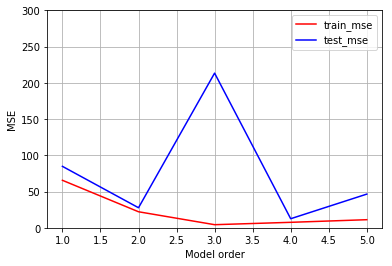

In [106]:
plot_model_sel(X_close_three_news_extra,Y_close_three_news_extra, 0.35)

In [107]:
def linear_regression_model(X, Y, degree, alpha, start, end):
    # dataset poly transfor:
    poly = PolynomialFeatures(int(alpha))
    X_poly = poly.fit_transform(X)
    Y_poly = Y
    y_plot = Y[int(start):int(end)]
    x_plot = X[int(start):int(end)]
    x_plot2 = X_poly[int(start):int(end)]
    y_plot2 = Y_poly[int(start):int(end)]
    

    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    X_train_poly, X_test_ploy, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.3)
    num = np.arange(len(X_test))
    # non poly, non redge:
    train_error, test_error, R2,ridge = linear_fit(X_train, X_test, Y_train, Y_test,0)
    prediction = ridge.predict(x_plot)
    
    num = np.arange(len(x_plot))
    plot(y_plot, prediction, num, "2 poly, 0.75 ridge")
    print( str(degree) + " poly," + str(alpha) + "non redge: train_error = {0:.2f} and test_error = {1:.2f}, r^2 = {2:.2f}".format(train_error,test_error,R2))
    

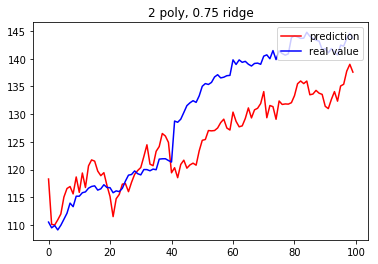

2 poly,0.75non redge: train_error = 60.75 and test_error = 60.47, r^2 = 0.79


In [108]:
linear_regression_model(X_close_three_news_extra,Y_close_three_news_extra,2,0.75, 500, 600)

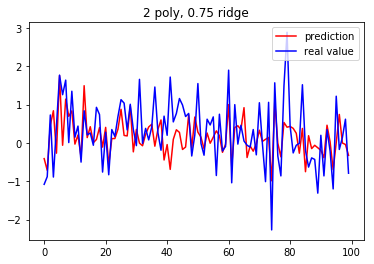

2 poly,0.75non redge: train_error = 1.27 and test_error = 1.48, r^2 = 0.23


In [109]:
linear_regression_model(X_different_three_news_extra,Y_different_three_news_extra,2, 0.75, 500, 600)

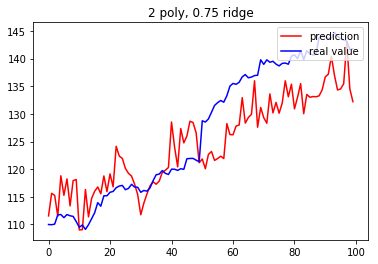

2 poly,0.75non redge: train_error = 46.90 and test_error = 54.20, r^2 = 0.84


In [110]:
linear_regression_model(X_close_all_news_extra,Y_close_all_news_extra,2,0.75, 500, 600)

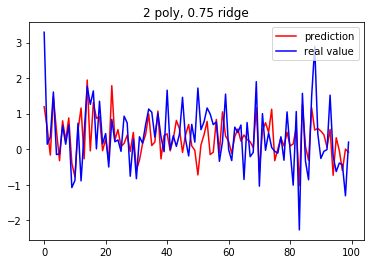

2 poly,0.75non redge: train_error = 1.33 and test_error = 1.07, r^2 = 0.28


In [113]:
linear_regression_model(X_different_all_news_extra,Y_different_all_news_extra,2,0.75, 500, 600)

# SVM models

Before process the SVM models, we need to transfer the y to 1 or -1

In [114]:
def transfer_y_binary(value):
    if value < 0:
        out = -1
    else:
        out = 1
    return out

In [115]:
def transfer_dataframe_to_x_y_for_SVM(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

In [116]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary)

In [117]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")


We need three kernals, with mutiple c as soft margin. <br>
kernal one: linear <br>
kernal two: RBF <br>
kernal three: Polynomial Kernel <br>

## SVM_linear

In [118]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

In [119]:
def svm_linear(X_train, X_test, Y_train, Y_test,c):
    svc_linear = svm.SVC(probability = False, kernel = "linear", C = c)
    
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))

    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_linear.append(c)

In [120]:
def plot_svm(c_svm_linear, acc_train_svm_linear, acc_test_svm_linear):
    plt.plot(c_svm_linear,acc_train_svm_linear,'g.-',label='train accuracy')
    plt.plot(c_svm_linear,acc_test_svm_linear,'r.-',label='test accuracy')
    plt.legend(loc='upper right')
    plt.show()

In [121]:
def SVM_linear(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_linear(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_linear, acc_train_svm_linear, acc_test_svm_linear)


In [122]:
cVals = list(np.arange(0.001,2,0.05))
print(cVals)

[0.001, 0.051000000000000004, 0.101, 0.15100000000000002, 0.201, 0.251, 0.30100000000000005, 0.35100000000000003, 0.401, 0.451, 0.501, 0.551, 0.6010000000000001, 0.651, 0.7010000000000001, 0.751, 0.801, 0.8510000000000001, 0.901, 0.9510000000000001, 1.001, 1.051, 1.101, 1.151, 1.201, 1.251, 1.301, 1.351, 1.401, 1.451, 1.501, 1.551, 1.601, 1.651, 1.701, 1.751, 1.801, 1.851, 1.901, 1.951]


0.001
Train Accuracy = 0.517621
Test Accuracy = 0.584615
0.501
Train Accuracy = 0.671806
Test Accuracy = 0.692308
1.001
Train Accuracy = 0.682819
Test Accuracy = 0.692308
1.501
Train Accuracy = 0.671806
Test Accuracy = 0.692308
2.001
Train Accuracy = 0.669604
Test Accuracy = 0.697436
2.501
Train Accuracy = 0.680617
Test Accuracy = 0.682051
3.001
Train Accuracy = 0.674009
Test Accuracy = 0.682051
3.501
Train Accuracy = 0.678414
Test Accuracy = 0.682051
4.001
Train Accuracy = 0.674009
Test Accuracy = 0.702564
4.501
Train Accuracy = 0.680617
Test Accuracy = 0.692308


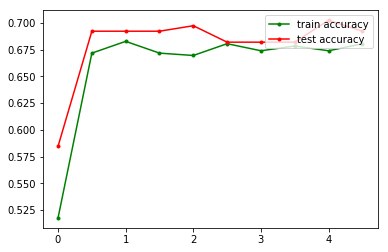

In [123]:
SVM_linear(X_different_three_news_extra,Y_different_three_news_extra)


In [124]:
def pca(X, k):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=k)
    lst = []
    for i in range(k):
        name = "principal component " + str(i + 1)
        lst.append(name)

    principalComponents = pca.fit_transform(X)

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = lst)
    return principalDf


0.001
Train Accuracy = 0.585903
Test Accuracy = 0.579487
0.501
Train Accuracy = 0.665198
Test Accuracy = 0.656410
1.001
Train Accuracy = 0.665198
Test Accuracy = 0.651282
1.501
Train Accuracy = 0.665198
Test Accuracy = 0.651282
2.001
Train Accuracy = 0.665198
Test Accuracy = 0.651282
2.501
Train Accuracy = 0.665198
Test Accuracy = 0.651282
3.001
Train Accuracy = 0.665198
Test Accuracy = 0.651282
3.501
Train Accuracy = 0.665198
Test Accuracy = 0.651282
4.001
Train Accuracy = 0.665198
Test Accuracy = 0.651282
4.501
Train Accuracy = 0.667401
Test Accuracy = 0.651282


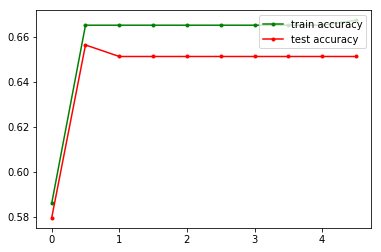

In [125]:
x_diff_three_pca = pca(X_different_three_news_extra, 5)
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []
SVM_linear(x_diff_three_pca,Y_different_three_news_extra)

0.001
Train Accuracy = 0.560870
Test Accuracy = 0.484848
0.501
Train Accuracy = 0.673913
Test Accuracy = 0.691919
1.001
Train Accuracy = 0.658696
Test Accuracy = 0.702020
1.501
Train Accuracy = 0.658696
Test Accuracy = 0.691919
2.001
Train Accuracy = 0.658696
Test Accuracy = 0.676768
2.501
Train Accuracy = 0.658696
Test Accuracy = 0.671717
3.001
Train Accuracy = 0.656522
Test Accuracy = 0.671717
3.501
Train Accuracy = 0.663043
Test Accuracy = 0.671717
4.001
Train Accuracy = 0.669565
Test Accuracy = 0.671717
4.501
Train Accuracy = 0.669565
Test Accuracy = 0.661616


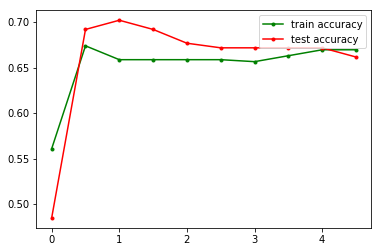

In [126]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []
SVM_linear(X_different_all_news_extra, Y_different_all_news_extra )

0.001
Train Accuracy = 0.563043
Test Accuracy = 0.540404
0.501
Train Accuracy = 0.676087
Test Accuracy = 0.646465
1.001
Train Accuracy = 0.676087
Test Accuracy = 0.646465
1.501
Train Accuracy = 0.676087
Test Accuracy = 0.651515
2.001
Train Accuracy = 0.676087
Test Accuracy = 0.651515
2.501
Train Accuracy = 0.676087
Test Accuracy = 0.651515
3.001
Train Accuracy = 0.676087
Test Accuracy = 0.651515
3.501
Train Accuracy = 0.676087
Test Accuracy = 0.651515
4.001
Train Accuracy = 0.676087
Test Accuracy = 0.651515
4.501
Train Accuracy = 0.676087
Test Accuracy = 0.651515


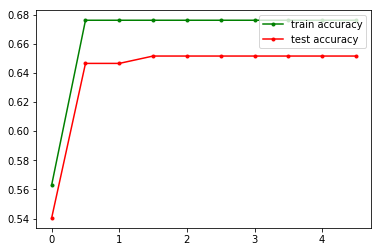

In [127]:
x_all_three_pca = pca(X_different_all_news_extra, 5)
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []
SVM_linear(x_all_three_pca,Y_different_all_news_extra)

## SVM with RBF

In [128]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

In [129]:
def svm_rbf(X_train, X_test, Y_train, Y_test,c):
    svc_linear = svm.SVC(probability = False, kernel = "rbf", C = c)
    
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_rbf.append(c)

In [130]:
def SVM_rbf(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_rbf(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_rbf,acc_train_svm_rbf,acc_test_svm_rbf)

0.001
Train Accuracy = 0.552863
Test Accuracy = 0.502564
0.501
Train Accuracy = 0.733480
Test Accuracy = 0.507692
1.001
Train Accuracy = 0.837004
Test Accuracy = 0.523077
1.501
Train Accuracy = 0.848018
Test Accuracy = 0.528205
2.001
Train Accuracy = 0.870044
Test Accuracy = 0.507692
2.501
Train Accuracy = 0.883260
Test Accuracy = 0.528205
3.001
Train Accuracy = 0.885463
Test Accuracy = 0.523077
3.501
Train Accuracy = 0.892070
Test Accuracy = 0.523077
4.001
Train Accuracy = 0.898678
Test Accuracy = 0.538462
4.501
Train Accuracy = 0.907489
Test Accuracy = 0.543590


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

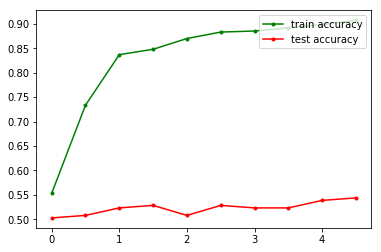

In [131]:
SVM_rbf(X_different_three_news_extra,Y_different_three_news_extra)

0.001
Train Accuracy = 0.559471
Test Accuracy = 0.487179
0.501
Train Accuracy = 0.682819
Test Accuracy = 0.620513
1.001
Train Accuracy = 0.693833
Test Accuracy = 0.625641
1.501
Train Accuracy = 0.707048
Test Accuracy = 0.615385
2.001
Train Accuracy = 0.713656
Test Accuracy = 0.600000
2.501
Train Accuracy = 0.720264
Test Accuracy = 0.594872
3.001
Train Accuracy = 0.731278
Test Accuracy = 0.600000
3.501
Train Accuracy = 0.740088
Test Accuracy = 0.589744
4.001
Train Accuracy = 0.742291
Test Accuracy = 0.579487
4.501
Train Accuracy = 0.744493
Test Accuracy = 0.589744


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

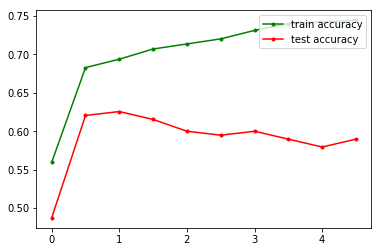

In [132]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []
X_different_three_news_extra_pca = pca(X_different_three_news_extra, 5)
SVM_rbf(X_different_three_news_extra_pca,Y_different_three_news_extra)

0.001
Train Accuracy = 0.545652
Test Accuracy = 0.520202
0.501
Train Accuracy = 0.693478
Test Accuracy = 0.550505
1.001
Train Accuracy = 0.702174
Test Accuracy = 0.575758
1.501
Train Accuracy = 0.702174
Test Accuracy = 0.555556
2.001
Train Accuracy = 0.719565
Test Accuracy = 0.555556
2.501
Train Accuracy = 0.730435
Test Accuracy = 0.560606
3.001


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Train Accuracy = 0.732609
Test Accuracy = 0.555556
3.501
Train Accuracy = 0.739130
Test Accuracy = 0.560606
4.001
Train Accuracy = 0.747826
Test Accuracy = 0.560606
4.501
Train Accuracy = 0.750000
Test Accuracy = 0.565657


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


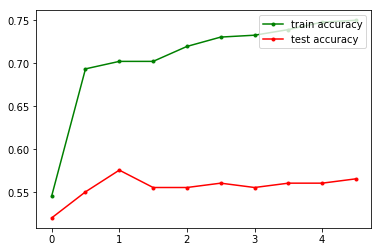

In [133]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []
SVM_rbf(X_different_all_news_extra, Y_different_all_news_extra )

0.001
Train Accuracy = 0.519565
Test Accuracy = 0.580808
0.501
Train Accuracy = 0.697826
Test Accuracy = 0.520202
1.001
Train Accuracy = 0.702174
Test Accuracy = 0.530303
1.501
Train Accuracy = 0.723913
Test Accuracy = 0.515152
2.001
Train Accuracy = 0.736957
Test Accuracy = 0.530303
2.501
Train Accuracy = 0.745652
Test Accuracy = 0.525253
3.001


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Train Accuracy = 0.747826
Test Accuracy = 0.520202
3.501
Train Accuracy = 0.750000
Test Accuracy = 0.545455
4.001
Train Accuracy = 0.750000
Test Accuracy = 0.540404
4.501
Train Accuracy = 0.763043
Test Accuracy = 0.550505


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


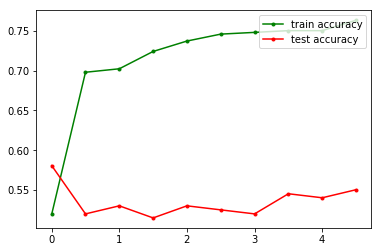

In [134]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []
X_different_all_news_extra_pca = pca(X_different_all_news_extra, 5)
SVM_rbf(X_different_all_news_extra, Y_different_all_news_extra )

In [135]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [136]:
def svm_poly(X_train, X_test, Y_train, Y_test,c):
    svc_linear = svm.SVC(probability = False, kernel = "poly", C = c)
    
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)

In [137]:
def SVM_poly(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_poly(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_poly,acc_train_svm_poly,acc_test_svm_poly)

0.001
Train Accuracy = 0.533040
Test Accuracy = 0.548718
0.501
Train Accuracy = 0.788546
Test Accuracy = 0.487179
1.001
Train Accuracy = 0.828194
Test Accuracy = 0.502564
1.501
Train Accuracy = 0.848018
Test Accuracy = 0.512821
2.001
Train Accuracy = 0.861233
Test Accuracy = 0.512821
2.501
Train Accuracy = 0.881057
Test Accuracy = 0.517949
3.001
Train Accuracy = 0.887665
Test Accuracy = 0.507692
3.501
Train Accuracy = 0.892070
Test Accuracy = 0.502564
4.001
Train Accuracy = 0.905286
Test Accuracy = 0.497436
4.501
Train Accuracy = 0.918502
Test Accuracy = 0.497436


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

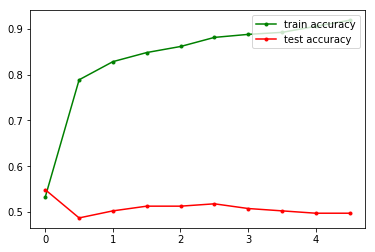

In [41]:
SVM_poly(X_different_three_news_extra,Y_different_three_news_extra)

0.001
Train Accuracy = 0.583700
Test Accuracy = 0.528205
0.501
Train Accuracy = 0.651982
Test Accuracy = 0.569231
1.001
Train Accuracy = 0.649780
Test Accuracy = 0.569231
1.501
Train Accuracy = 0.649780
Test Accuracy = 0.569231
2.001
Train Accuracy = 0.649780
Test Accuracy = 0.569231
2.501
Train Accuracy = 0.649780
Test Accuracy = 0.569231
3.001


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Train Accuracy = 0.649780
Test Accuracy = 0.569231
3.501
Train Accuracy = 0.649780
Test Accuracy = 0.569231
4.001
Train Accuracy = 0.649780
Test Accuracy = 0.569231
4.501
Train Accuracy = 0.649780
Test Accuracy = 0.569231


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


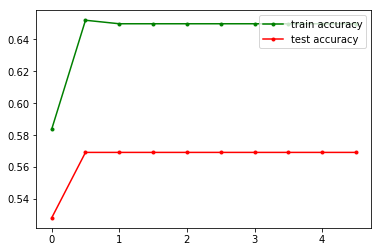

In [138]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
X_different_three_news_extra_pca = pca(X_different_three_news_extra,3)
SVM_poly(X_different_three_news_extra_pca, Y_different_three_news_extra)

In [139]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
SVM_poly(X_different_all_news_extra, Y_different_all_news_extra )

0.001


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

0.001
Train Accuracy = 0.597826
Test Accuracy = 0.520202
0.501


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152
1.001


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152
1.501


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152
2.001


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152
2.501


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152
3.001


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152
3.501


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152
4.001


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152
4.501


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy = 0.610870
Test Accuracy = 0.515152


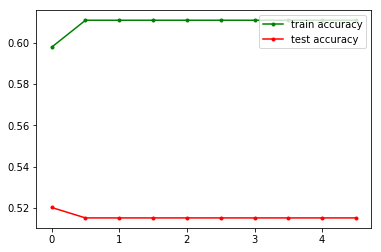

In [140]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
X_different_all_news_extra_pca = pca(X_different_all_news_extra,3)
SVM_poly(X_different_all_news_extra_pca, Y_different_all_news_extra)

# Neural Network models

### non-lib

In [49]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 2))
    for i in range(len(y)):
        if y[i] <= 0:
            y_vect[i][0] = 1
        else:
            y_vect[i][1] = 1
    return y_vect

def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    print(y)
    return y

In [50]:
# convert y to [1,0] and [0,1]

In [51]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary)

In [52]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")


In [53]:
print(X_different_three_news_extra.shape)

(649, 11)


In [54]:
nn_structure = [11, 12, 2]

nn_structure2 = []

X_train, X_test, Y_train, Y_test = train_test_split(X_different_three_news_extra, Y_different_three_news_extra, test_size=0.3)
Y_V_train = convert_y_to_vect(Y_train)
Y_V_test = convert_y_to_vect(Y_test)
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, Y_V_train, 3000)

# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(Y_test, y_pred) * 100))

NameError: name 'r' is not defined

### keras lib


In [45]:
def transfer_y_binary_keras(value):
    if value < 0:
        out = 0
    else:
        out = 1
    return out

In [46]:
def transfer_dataframe_to_x_y_for_SVM(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

In [47]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary_keras)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary_keras)


In [48]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")
X_different_three_news_extra = StandardScaler().fit_transform(X_different_three_news_extra)
X_different_all_news_extra =  StandardScaler().fit_transform(X_different_all_news_extra)


In [66]:
# passing x, y before separate into train and test
# hidenLayer is hidden layer as list. eg [10,4,2] is three hiden layer with 10 number of Neural etc. 
# activation is activation function
# activity_regularizer is how much to regularizer
### kernel_constraint is for constraint number using 
# optimizer is optimiz function such as sgd
# batch_size is smaple size for each gd renew, 每次梯度更新的样本数
# epochs: number iterations of generation
def nn_classifier(x, y, hidenLayer, activation, regularizer, 
                  optimizer, batch_size, epochs):
    
    model = Sequential()
    n_parameter = x.shape[1]
    model.add(Dense(hidenLayer[0], input_shape = (n_parameter,), activation = activation, name = "hidden",
                   activity_regularizer = regularizers.l2(regularizer)))
    
    if len(hidenLayer) > 1:
        for layer in range(1,len(hidenLayer)):
            name_in = "hidden" + str(layer)
            model.add(Dense(hidenLayer[layer], activation = activation, name = name_in,
                   activity_regularizer = regularizers.l2(regularizer)))
            
    model.add(Dense(1, activation=activation,activity_regularizer = regularizers.l2(regularizer), 
                    name='output'))
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=[metrics.binary_accuracy])
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

    model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size,verbose=0)

    lossi_Out, AccOut = model.evaluate(X_test,Y_test, verbose=0)
    lossi_In, AccIn = model.evaluate(X_train,Y_train, verbose=0)
    
    print()
    print("RESULT: ")
    print("optimizer="+optimizer+", activation=" + activation) 
    print("batch_size=%3d, epoch=%4d, regularizer=%7.5f, loss=%12.4e, AccIn=%7.5f, AccOut=%7.5f" % (batch_size, 
                                                                                               epochs,
                                                                                               regularizer,
                                                                                               lossi_In,
                                                                                               AccIn,
                                                                                               AccOut))
    print()
 

### Sigmoid, SGD

In [68]:
### for all sigmoid functions with sgd, with one hidden layer. changing iter size, regularizer rate, and batch size,
for batch_size in range(30, 600, 100):
    for iter_time in range(1000, 10001, 3000):
        K.clear_session()
        nn_classifier(X_different_all_news_extra, Y_different_all_news_extra,[15],'sigmoid', 0.001,"sgd",batch_size,iter_time)
        print("==================================================================================================")
        


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size= 30, epoch=1000, regularizer=0.00100, loss=  6.4690e-01, AccIn=0.69962, AccOut=0.65909


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size= 30, epoch=4000, regularizer=0.00100, loss=  5.4074e-01, AccIn=0.75285, AccOut=0.67424


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  5.0471e-01, AccIn=0.74525, AccOut=0.65909


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size= 30, epoch=10000, regularizer=0.00100, loss=  4.7659e-01, AccIn=0.75856, AccOut=0.64394


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size=130, epoch=1000, regularizer=0.00100, loss=  6.6499e-01, AccIn=0.68441, AccOut=0.58333


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size=130, epoch=4000, regularizer=0.00100, loss=  6.0943e-01, AccIn=0.69011, AccOut=0.64394


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size=130, epoch=7000, regularizer=0.00100, loss=  5.9536e-01, AccIn=0.69772, AccOut=0.69697

In [70]:
### for all sigmoid functions with sgd, with one hidden layer. changing iter size, regularizer rate, and batch size,
for batch_size in range(30, 600, 100):
    for iter_time in range(1000, 10001, 3000):
        K.clear_session()
        nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,[6],'sigmoid', 0.001,"sgd",batch_size,iter_time)
        print("==================================================================================================")
 


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size= 30, epoch=1000, regularizer=0.00100, loss=  6.4702e-01, AccIn=0.67052, AccOut=0.67692


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size= 30, epoch=4000, regularizer=0.00100, loss=  6.1047e-01, AccIn=0.69750, AccOut=0.64615


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  6.0486e-01, AccIn=0.67630, AccOut=0.67692


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size= 30, epoch=10000, regularizer=0.00100, loss=  5.8157e-01, AccIn=0.72254, AccOut=0.66154


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size=130, epoch=1000, regularizer=0.00100, loss=  6.6339e-01, AccIn=0.64933, AccOut=0.63846


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size=130, epoch=4000, regularizer=0.00100, loss=  6.0780e-01, AccIn=0.68015, AccOut=0.64615


RESULT: 
optimizer=sgd, activation=sigmoid
batch_size=130, epoch=7000, regularizer=0.00100, loss=  6.0970e-01, AccIn=0.68786, AccOut=0.61538

### Sigmoid, RMSprop

In [71]:
### for all sigmoid functions with rmsprop, with one hidden layer. changing iter size, regularizer rate, and batch size,
for batch_size in range(30, 600, 100):
    for iter_time in range(1000, 10001, 3000):
        K.clear_session()
        nn_classifier(X_different_all_news_extra, Y_different_all_news_extra,[15],'sigmoid', =,"rmsprop",batch_size,iter_time)
        print("==================================================================================================")



RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=1000, regularizer=0.00100, loss=  4.9893e-01, AccIn=0.75475, AccOut=0.66667


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=4000, regularizer=0.00100, loss=  3.8897e-01, AccIn=0.81179, AccOut=0.56061


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  3.6047e-01, AccIn=0.84601, AccOut=0.55303


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=10000, regularizer=0.00100, loss=  3.5384e-01, AccIn=0.85361, AccOut=0.62879


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=130, epoch=1000, regularizer=0.00100, loss=  5.7989e-01, AccIn=0.68441, AccOut=0.67424


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=130, epoch=4000, regularizer=0.00100, loss=  4.7651e-01, AccIn=0.76236, AccOut=0.58333


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=130, epoch=7000, regularizer=0.00100, loss=  4.5772e-01, A

In [72]:
### for all sigmoid functions with rmsprop, with one hidden layer. changing iter size, regularizer rate, and batch size,
for batch_size in range(30, 600, 100):
    for iter_time in range(1000, 10001, 3000):
        K.clear_session()
        nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,[6],'sigmoid', 0.001,"rmsprop",batch_size,iter_time)
        print("==================================================================================================")



RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=1000, regularizer=0.00100, loss=  5.7825e-01, AccIn=0.71098, AccOut=0.62308


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=4000, regularizer=0.00100, loss=  5.3996e-01, AccIn=0.70906, AccOut=0.65385


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  5.5297e-01, AccIn=0.72254, AccOut=0.72308


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=10000, regularizer=0.00100, loss=  5.0125e-01, AccIn=0.74566, AccOut=0.56154


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=130, epoch=1000, regularizer=0.00100, loss=  5.9830e-01, AccIn=0.67823, AccOut=0.63846


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=130, epoch=4000, regularizer=0.00100, loss=  5.8163e-01, AccIn=0.69171, AccOut=0.64615


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=130, epoch=7000, regularizer=0.00100, loss=  5.6862e-01, A

### relu, SGD

In [73]:
### for all relu functions with sgd, with one hidden layer. changing iter size, regularizer rate, and batch size,
for batch_size in range(30, 600, 100):
    for iter_time in range(1000, 10001, 3000):
        K.clear_session()
        nn_classifier(X_different_all_news_extra, Y_different_all_news_extra,[15],'relu', 0.001,"sgd",batch_size,iter_time)
        print("==================================================================================================")



RESULT: 
optimizer=sgd, activation=relu
batch_size= 30, epoch=1000, regularizer=0.00100, loss=  6.3608e-01, AccIn=0.74525, AccOut=0.61364


RESULT: 
optimizer=sgd, activation=relu
batch_size= 30, epoch=4000, regularizer=0.00100, loss=  8.4286e+00, AccIn=0.47529, AccOut=0.45455


RESULT: 
optimizer=sgd, activation=relu
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  7.9778e-01, AccIn=0.65779, AccOut=0.58333


RESULT: 
optimizer=sgd, activation=relu
batch_size= 30, epoch=10000, regularizer=0.00100, loss=  8.7028e+00, AccIn=0.46008, AccOut=0.46970


RESULT: 
optimizer=sgd, activation=relu
batch_size=130, epoch=1000, regularizer=0.00100, loss=  4.9973e-01, AccIn=0.75095, AccOut=0.62879


RESULT: 
optimizer=sgd, activation=relu
batch_size=130, epoch=4000, regularizer=0.00100, loss=  5.0473e-01, AccIn=0.69962, AccOut=0.62121


RESULT: 
optimizer=sgd, activation=relu
batch_size=130, epoch=7000, regularizer=0.00100, loss=  5.1718e-01, AccIn=0.72053, AccOut=0.56061


RESULT: 
optimizer

In [74]:
### for all relu functions with sgd, with one hidden layer. changing iter size, regularizer rate, and batch size,
for batch_size in range(30, 600, 100):
    for iter_time in range(1000, 10001, 3000):
        K.clear_session()
        nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,[6],'relu', 0.001,"sgd",batch_size,iter_time)
        print("==================================================================================================")



RESULT: 
optimizer=sgd, activation=relu
batch_size= 30, epoch=1000, regularizer=0.00100, loss=  6.0335e-01, AccIn=0.70135, AccOut=0.62308


RESULT: 
optimizer=sgd, activation=relu
batch_size= 30, epoch=4000, regularizer=0.00100, loss=  5.4179e-01, AccIn=0.69364, AccOut=0.62308


RESULT: 
optimizer=sgd, activation=relu
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  6.4763e-01, AccIn=0.69942, AccOut=0.56154


RESULT: 
optimizer=sgd, activation=relu
batch_size= 30, epoch=10000, regularizer=0.00100, loss=  7.3845e-01, AccIn=0.70135, AccOut=0.57692


RESULT: 
optimizer=sgd, activation=relu
batch_size=130, epoch=1000, regularizer=0.00100, loss=  8.6337e+00, AccIn=0.46435, AccOut=0.45385


RESULT: 
optimizer=sgd, activation=relu
batch_size=130, epoch=4000, regularizer=0.00100, loss=  5.4273e-01, AccIn=0.73603, AccOut=0.61538


RESULT: 
optimizer=sgd, activation=relu
batch_size=130, epoch=7000, regularizer=0.00100, loss=  8.6039e+00, AccIn=0.46628, AccOut=0.44615


RESULT: 
optimizer

### relu, RMSprop

In [75]:
### for all relu functions with rmsprop, with one hidden layer. changing iter size, regularizer rate, and batch size,
for batch_size in range(30, 600, 100):
    for iter_time in range(1000, 10001, 3000):
        K.clear_session()
        nn_classifier(X_different_all_news_extra, Y_different_all_news_extra,[15],'relu', 0.001,"rmsprop",batch_size,iter_time)
        print("==================================================================================================")



RESULT: 
optimizer=rmsprop, activation=relu
batch_size= 30, epoch=1000, regularizer=0.00100, loss=  3.8717e-01, AccIn=0.81369, AccOut=0.58333


RESULT: 
optimizer=rmsprop, activation=relu
batch_size= 30, epoch=4000, regularizer=0.00100, loss=  5.2062e-01, AccIn=0.75475, AccOut=0.53030


RESULT: 
optimizer=rmsprop, activation=relu
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  5.2589e-01, AccIn=0.80228, AccOut=0.55303


RESULT: 
optimizer=rmsprop, activation=relu
batch_size= 30, epoch=10000, regularizer=0.00100, loss=  3.3152e-01, AccIn=0.80038, AccOut=0.55303


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.00100, loss=  4.8771e-01, AccIn=0.77186, AccOut=0.71212


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=4000, regularizer=0.00100, loss=  4.5520e-01, AccIn=0.79848, AccOut=0.62879


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=7000, regularizer=0.00100, loss=  4.1608e-01, AccIn=0.83840, AccOut=

In [76]:
### for all relu functions with rmsprop, with one hidden layer. changing iter size, regularizer rate, and batch size,
for batch_size in range(30, 600, 100):
    for iter_time in range(1000, 10001, 3000):
        K.clear_session()
        nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,[6],'relu', 0.001,"rmsprop",batch_size,iter_time)
        print("==================================================================================================")



RESULT: 
optimizer=rmsprop, activation=relu
batch_size= 30, epoch=1000, regularizer=0.00100, loss=  6.5440e-01, AccIn=0.73410, AccOut=0.64615


RESULT: 
optimizer=rmsprop, activation=relu
batch_size= 30, epoch=4000, regularizer=0.00100, loss=  5.9349e-01, AccIn=0.68208, AccOut=0.64615


RESULT: 
optimizer=rmsprop, activation=relu
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  5.3251e-01, AccIn=0.70713, AccOut=0.62308


RESULT: 
optimizer=rmsprop, activation=relu
batch_size= 30, epoch=10000, regularizer=0.00100, loss=  5.6048e-01, AccIn=0.70906, AccOut=0.65385


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.00100, loss=  5.6860e-01, AccIn=0.68979, AccOut=0.66154


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=4000, regularizer=0.00100, loss=  5.6041e-01, AccIn=0.71291, AccOut=0.60769


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=7000, regularizer=0.00100, loss=  5.7313e-01, AccIn=0.71676, AccOut=

### Further improve by set regularizer and hidden layer
the best model for all news paramters within 1000-10000 iter size, 30 - 600 batch size, and relu or sigmoid, and RMSprop or SGD is <br>
the best model for three news paramters within 1000-10000 iter size, 30 - 600 batch size, and relu or sigmoid, and RMSprop or SGD is <br>

In [77]:
iter_size_all = 1000
batch_all = 130
active_f_all = "relu"
opti_f_all = "rmsprop"

iter_size_three = 7000
batch_three = 30
active_f_three = "sigmoid" 
opti_f_three = "rmsprop"

hidden_layer_all_parameter = [15,8]
hidden_layer_three_parameter = [6,3]

def test_regu_hid(x,y,layer,active_f,opti_f,batch,iter_size):
    for reglu in range(5):
        K.clear_session()
        nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,[6],'relu', 0.001,"rmsprop",batch_size,iter_time)
        nn_classifier(x, y,layer,active_f, 0.001,opti_f,batch,iter_size)
        print("==================================================================================================")

In [80]:
reg = [0.00001, 0.0001,0.001,0.01,0.1,0.5,0.75]
for number in reg:
    K.clear_session()
    nn_classifier(X_different_all_news_extra, Y_different_all_news_extra,
                  hidden_layer_all_parameter,
                  active_f_all, number, opti_f_all,batch_all,iter_size_all)
    print("==================================================================================================")

    


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.00001, loss=  5.2701e-01, AccIn=0.74144, AccOut=0.57576


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.00010, loss=  4.8254e-01, AccIn=0.78327, AccOut=0.59091


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.00100, loss=  4.3879e-01, AccIn=0.76806, AccOut=0.57576


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.01000, loss=  7.3488e-01, AccIn=0.56274, AccOut=0.59091


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.10000, loss=  1.1538e+00, AccIn=0.47529, AccOut=0.40909


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.50000, loss=  1.5433e+00, AccIn=0.46008, AccOut=0.46970


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.75000, loss=  1.6209e+00, AccIn=0.47338, AccOut=0

In [82]:
for number in reg:
    K.clear_session()
    nn_classifier(X_different_all_news_extra, Y_different_all_news_extra,
                  [15],
                  active_f_all, number, opti_f_all,batch_all,iter_size_all)
    print("==================================================================================================")



RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.00001, loss=  6.5450e-01, AccIn=0.70342, AccOut=0.59848


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.00010, loss=  5.3403e-01, AccIn=0.75475, AccOut=0.65909


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.00100, loss=  4.3112e-01, AccIn=0.77947, AccOut=0.54545


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.01000, loss=  6.4947e-01, AccIn=0.64259, AccOut=0.53030


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.10000, loss=  1.1033e+00, AccIn=0.47148, AccOut=0.42424


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.50000, loss=  1.5329e+00, AccIn=0.45817, AccOut=0.47727


RESULT: 
optimizer=rmsprop, activation=relu
batch_size=130, epoch=1000, regularizer=0.75000, loss=  1.6123e+00, AccIn=0.46768, AccOut=0

In [84]:
for number in reg:
    K.clear_session()
    nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,
                  hidden_layer_three_parameter,
                  active_f_three, number, opti_f_three,batch_three,iter_size_three)
    print("==================================================================================================")



RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00001, loss=  4.8221e-01, AccIn=0.76301, AccOut=0.63077


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00010, loss=  4.6921e-01, AccIn=0.78420, AccOut=0.61538


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  5.3109e-01, AccIn=0.73988, AccOut=0.66923


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.01000, loss=  6.7385e-01, AccIn=0.69750, AccOut=0.65385


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.10000, loss=  1.0533e+00, AccIn=0.44123, AccOut=0.54615


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.50000, loss=  2.1560e+00, AccIn=0.46821, AccOut=0.43846


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.75000, loss=  1.4994e+00, Ac

In [85]:
for number in reg:
    K.clear_session()
    nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,
                  [6],
                  active_f_three, number, opti_f_three,batch_three,iter_size_three)
    print("==================================================================================================")



RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00001, loss=  5.0564e-01, AccIn=0.75915, AccOut=0.66923


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00010, loss=  4.9654e-01, AccIn=0.76108, AccOut=0.63846


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.00100, loss=  5.4169e-01, AccIn=0.72254, AccOut=0.63077


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.01000, loss=  6.4138e-01, AccIn=0.72447, AccOut=0.56154


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.10000, loss=  1.1222e+00, AccIn=0.47977, AccOut=0.42308


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.50000, loss=  1.6588e+00, AccIn=0.44894, AccOut=0.51538


RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size= 30, epoch=7000, regularizer=0.75000, loss=  1.7524e+00, Ac